In [17]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [18]:
def load_mas_file(filename):
    try:
        with open(filename,"r") as fp:
            line = fp.readline()
        
        keynames = line.split(",")
        keynames = [key.strip('\n') for key in keynames]
        keynames = [key.strip('"') for key in keynames]
        keynames = [key.strip(' "') for key in keynames]
        dictionary = dict.fromkeys(keynames, None)
        data = np.genfromtxt(filename,skip_header = 1)

        for i,key in enumerate(keynames):
            dictionary[key] = data[:,i]
        df = pd.DataFrame.from_dict(dictionary)
        return df
    except:
        pass

In [19]:
mas_filename = "output/dfn_diffusion_no_flow-mas.dat"

In [20]:
df = load_mas_file(mas_filename)

In [21]:
df

,Time [y],dt_flow [y],dt_tran [y],Global Water Mass [kg],Global TRACER [mol],INFLOW Water Mass [kg],INFLOW Water Mass [kg/y],INFLOW TRACER [mol],INFLOW TRACER [mol/y],OUTFLOW Water Mass [kg],OUTFLOW Water Mass [kg/y],OUTFLOW TRACER [mol],OUTFLOW TRACER [mol/y]
0,0.1,0.1,0.1,0.349615,0.011297,-0.0,-0.0,0.011250,0.112498,-0.0,-0.0,-2.397724e-10,-2.397724e-09
1,0.3,0.2,0.2,0.349615,0.021528,-0.0,-0.0,0.021482,0.051159,-0.0,-0.0,-9.072006e-08,-4.524014e-07
2,0.7,0.4,0.4,0.349615,0.035532,-0.0,-0.0,0.035492,0.035025,-0.0,-0.0,-6.157115e-06,-1.516599e-05
3,1.5,0.8,0.8,0.349615,0.056029,-0.0,-0.0,0.056119,0.025784,-0.0,-0.0,-1.368667e-04,-1.633870e-04
4,3.1,1.6,1.6,0.349615,0.084067,-0.0,-0.0,0.085404,0.018303,-0.0,-0.0,-1.383585e-03,-7.791992e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,960.0,10.0,10.0,0.349615,0.161182,-0.0,-0.0,4.390642,0.004439,-0.0,-0.0,-4.229433e+00,-4.439215e-03
103,970.0,10.0,10.0,0.349615,0.161182,-0.0,-0.0,4.435033,0.004439,-0.0,-0.0,-4.273825e+00,-4.439215e-03
104,980.0,10.0,10.0,0.349615,0.161182,-0.0,-0.0,4.479427,0.004439,-0.0,-0.0,-4.318217e+00,-4.439215e-03
105,990.0,10.0,10.0,0.349615,0.161182,-0.0,-0.0,4.523819,0.004439,-0.0,-0.0,-4.362609e+00,-4.439215e-03


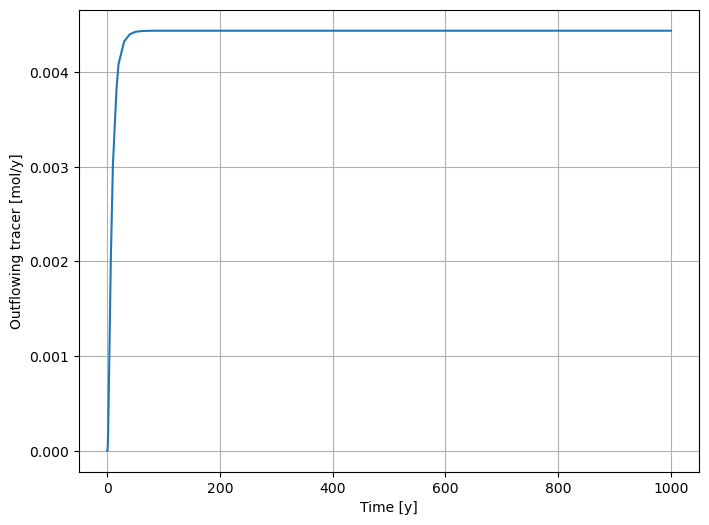

In [22]:
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(df['Time [y]'], -1*df['OUTFLOW TRACER [mol/y]'])
plt.xlabel('Time [y]')
plt.ylabel('Outflowing tracer [mol/y]')
# plt.xscale('log')
plt.grid(True)
plt.show()

The BTC is normalised such that the plateau reaches a unitary value

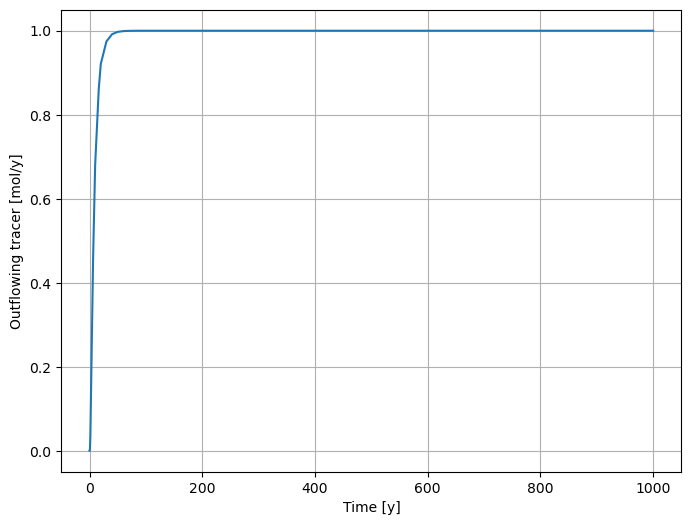

In [23]:
# cNorm = -1*df['OUTFLOW TRACER [mol/y]']/np.sum(-1*df['OUTFLOW TRACER [mol/y]'])
cPlateau1 = np.array(-1*df['OUTFLOW TRACER [mol/y]']/np.max(-1*df['OUTFLOW TRACER [mol/y]']))
time = df['Time [y]']
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(time, cPlateau1)
plt.xlabel('Time [y]')
plt.ylabel('Outflowing tracer [mol/y]')
# plt.xscale('log')
plt.grid(True)
plt.show()

First and second statistical moment are computed from the unitary BTC

In [24]:
meanNP = np.mean(cPlateau1)
# np.diff(time)
meanInt = np.sum(np.diff(time)*(cPlateau1[:-1]+cPlateau1[1:])/2)

Complementary BTC

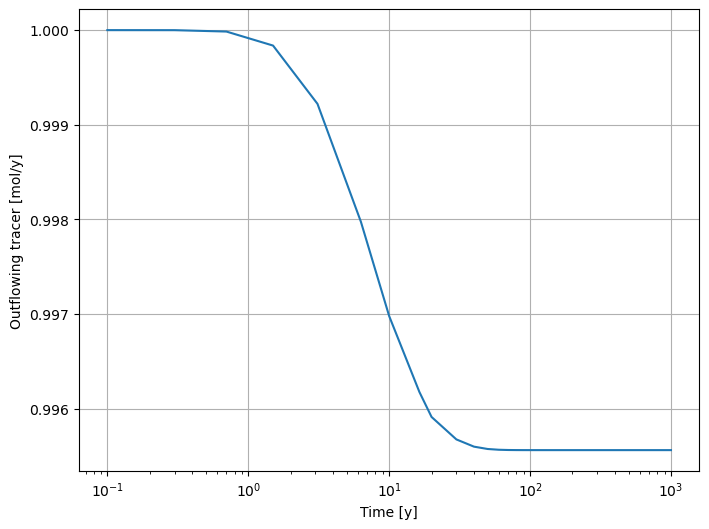

In [25]:
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(df['Time [y]'], 1+df['OUTFLOW TRACER [mol/y]'])
plt.xlabel('Time [y]')
plt.ylabel('Outflowing tracer [mol/y]')
plt.xscale('log')
plt.grid(True)
plt.show()

In [26]:
df.keys()

Index(['Time [y]', 'dt_flow [y]', 'dt_tran [y]', 'Global Water Mass [kg]',
       'Global TRACER [mol]', 'INFLOW Water Mass [kg]',
       'INFLOW Water Mass [kg/y]', 'INFLOW TRACER [mol]',
       'INFLOW TRACER [mol/y]', 'OUTFLOW Water Mass [kg]',
       'OUTFLOW Water Mass [kg/y]', 'OUTFLOW TRACER [mol]',
       'OUTFLOW TRACER [mol/y]'],
      dtype='object')